# 부스팅(boosting)

### 부스팅(Boosting)
- 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서
- 잘못 예측된 데이터에 가중치(weight) 부여를 통해
- 오류를 개선해 나가면서 학습하는 방식

### 대표적 부스팅 알고리즘

- AdaBoost(Adaptive Boosting) 계열
- Gradient Boosting 계열
    - GBM(Gradient Boosting Model)
    - XGBoost(eXtra Gradient Boosting)
    - LightGBM

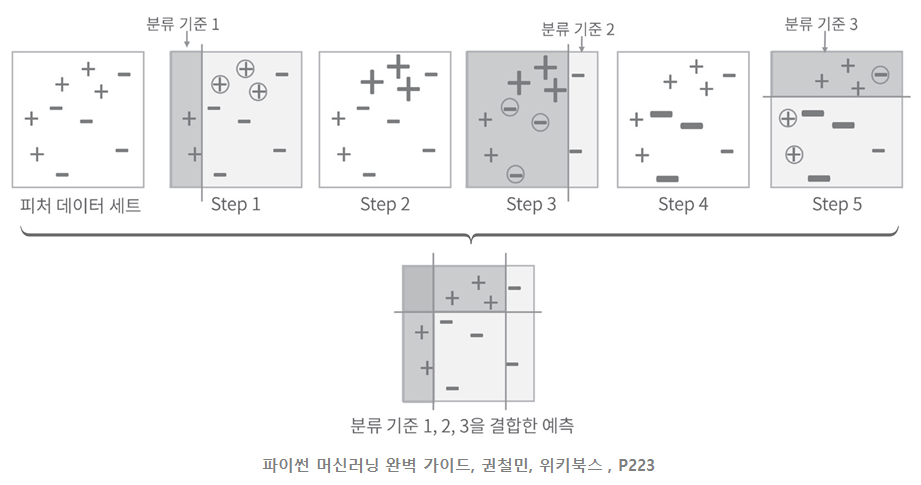

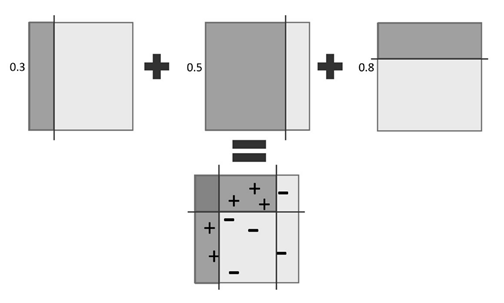

---------------------------------------------

In [1]:
from sklearn.ensemble import AdaBoostClassifier

In [2]:
AdaBoostClassifier?

Init signature:
AdaBoostClassifier(
    estimator=None,
    *,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='deprecated',
    random_state=None,
)
Docstring:     
An AdaBoost classifier.

An AdaBoost [1]_ classifier is a meta-estimator that begins by fitting a
classifier on the original dataset and then fits additional copies of the
classifier on the same dataset but where the weights of incorrectly
classified instances are adjusted such that subsequent classifiers focus
more on difficult cases.

This class implements the algorithm based on [2]_.

Read more in the :ref:`User Guide <adaboost>`.

.. versionadded:: 0.14

Parameters
----------
estimator : object, default=None
    The base estimator from which the boosted ensemble is built.
    Support for sample weighting is required, as well as proper
    ``classes_`` and ``n_classes_`` attributes. If ``None``, then
    the base estimator is :class:`~sklearn.tree.DecisionTreeClassifier`
    initialized with `max_depth=1`.

  

## GBM(Gradient Boosting Machine)

- AdaBoost와 유사하지만
- 가중치 업데이터를 **경사 하강법**을 이용하는 것이 큰 차이
    - 반복 수행을 통해 오류를 최소화할 수 있도록
    - 가중치의 업데이트 값을 도출
    - 오류값 = 실제값 - 예측값
    
    
- 분류와 회귀 둘 다 가능

#### 참고. 경사 하강법(Gradient Descent)
- 함수의 기울기(경사)를 구하고 경사의 절대값이 낮은 쪽으로 계속 이동시켜 극값에 이를 때까지 반복시키는 것(위키백과)
- 제시된 함수의 기울기로 최소값을 찾아내는 머신러닝 알고리즘
- 매개변수를 반복적으로 조정해서 최소 함수값을 갖게하는 독립변수를 찾는 방법


- https://en.wikipedia.org/wiki/Gradient_descent
- https://ko.wikipedia.org/wiki/경사하강법

#### GBM이 극복해야 할 중요 과제 : 수행 시간

- GBM은 **`수행 시간이 오래 걸린다`** 는 단점이 있지만 **`과적합에도 강해서`** 예측 성능이 뛰어난 알고리즘  
- 많은 알고리즘이 GBM을 기반으로 새롭게 만들어지고 있음
- 머신러닝 세계에서 가장 각광을 받는 그래디언트 부스팅 기반 ML 패키지
    - XGBoost
    - LightGBM

### 사이킷런의 GBM 클래스

- sklearn.ensemble.GradientBoostingClassifier

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [3]:
from sklearn.ensemble import GradientBoostingClassifier

#### GBM의 주요 하이퍼 파라미터  

**`loss`** : 경사 하강법에서 사용할 비용 함수 지정. 기본값은 'deviance'
    
**`n_estimators`** : weak learner의 개수. 기본값 100

**`learning_rate`** : GBM이 학습을 진행할 때마다 적용하는 학습률
- weak learner가 순차적으로 오류값을 보정해 나가는 데 적용하는 계수
- 0 ~ 1 사이의 값 지정 (기본값 0.1)

**`subsample`** : weak learner가 학습에 사용하는 데이터의 샘플링 비율
- 기본값 1 : 전체 학습 데이터를 기반으로 학습한다는 의미
- 0.5 : 학습 데이터의 50%
- 과적합이 염려되는 경우 1보다 작은 값으로 설정

--------------------------------------

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [5]:
import sys 
sys.path.append('mymodule')

In [6]:
from mymodule.evals import print_eval_score, show_confusion_matrix
from mymodule.dtVisual import plot_ftr_importances

In [7]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                   test_size=0.2, random_state=2020158011,
                                                   shuffle=True)

In [8]:
ada_clf = AdaBoostClassifier(random_state=2020158011)
ada_clf.fit(X_train, y_train)
pred = ada_clf.predict(X_test)
pred_proba = ada_clf.predict_proba(X_test)[:,1]
print_eval_score(y_test, pred, pred_proba)

accuracy : 0.9298, recall : 0.9231, precision : 0.9730
f1: 0.9474, g-measure: 0.9477


|모델|성능지표|
|---|---|
|LogisticRegression|accuracy:0.9386 recall:0.9740 precision:0.9375 f1:0.9554 g-measure:0.9556 AUC:0.9881|
|KNN|accuracy:0.9386 recall:0.9481 precision:0.9605 f1:0.9542 g-measure:0.9543 AUC:0.9544|
|Soft Voting|accuracy:0.9474 recall:0.9870 precision:0.9383 f1:0.9620 g-measure:0.9623 AUC:0.9853|
|Hard Voting|accuracy:0.9386 recall:0.9351 precision:0.9730 f1:0.9536 g-measure:0.9538|
|RandomForest(n_estimators=100)|accuracy:0.9561 recall:0.9740 precision:0.9615 f1:0.9677 g-measure:0.9678 AUC:0.9893|
|RandomForest(n_estimators=200)|accuracy:0.9474 recall:0.9610 precision:0.9610 f1:0.9610 g-measure:0.9610 AUC:0.9907|
|RandomForest: <br>{'max_depth': 8, 'min_samples_leaf': 1,<br> 'min_samples_split': 2, 'n_estimators': 100}|accuracy:0.9474 recall:0.9610 precision:0.9610 f1:0.9610 g-measure:0.9610 AUC:0.9933|
|RandomForest : <br>{'min_samples_split': 2, <br>'min_impurity_decrease': np.float64(0.0002), 'max_depth': 13}|accuracy:0.9474 recall:0.9610 precision:0.9610 f1:0.9610 g-measure:0.9610 AUC: :0.9926|
|AdaBoost|accuracy:0.9474 recall:0.9870 precision:0.9383 f1:0.9620 g-measure:0.9623 AUC:0.9919|

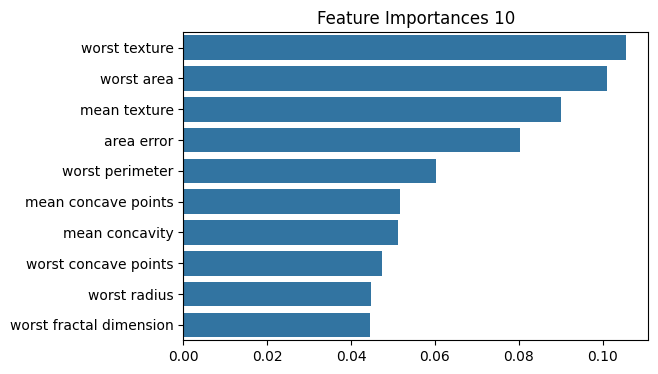

In [9]:
plot_ftr_importances(ada_clf, cancer.feature_names, top_n=10)

### 실습. 유방암 악성/양성 분류

#### 데이터세트 로딩

In [10]:
from sklearn.model_selection import cross_val_score, cross_validate
import numpy as np

In [11]:
ada_clf = AdaBoostClassifier(random_state=0)
scores = cross_val_score(ada_clf,X_train,y_train,cv=5,scoring='accuracy')
print(f'cv =5 : {scores}')
print(f'평균 정확도 {np.mean(scores):.5f}')

cv =5 : [0.94505495 0.97802198 0.95604396 1.         0.97802198]
평균 정확도 0.97143


In [12]:
scores = cross_validate(ada_clf, X_train, y_train, scoring=['accuracy','roc_auc'])
print(f'cv =5 : {scores}')
print(f'평균 정확도 {np.mean(scores):.5f}')

cv =5 : {'fit_time': array([0.08283091, 0.07970524, 0.08251452, 0.07872438, 0.0788641 ]), 'score_time': array([0.        , 0.01575232, 0.0065372 , 0.        , 0.01595616]), 'test_accuracy': array([0.94505495, 0.97802198, 0.95604396, 1.        , 0.97802198]), 'test_roc_auc': array([0.99090909, 0.9994898 , 0.99081633, 1.        , 0.99795918])}


TypeError: unsupported operand type(s) for /: 'dict' and 'int'

#### Split Dataset

In [ ]:
conda install -c conda-forge py-xgboost

In [13]:
from sklearn.model_selection import RandomizedSearchCV

In [14]:
params ={ 'n_estimators'  : range(50,100,10),
         'learning_rate' : [0.0001, 0.001, 0.01, 0.03, 0.05, 0.1, 0.2, 0.5, 1],
         'random_state'  : [0, 42, 156]}

ada_clf = AdaBoostClassifier()
rm_cv = RandomizedSearchCV(ada_clf, param_distributions=params, n_iter=100, n_jobs=-1)
rm_cv.fit(X_train, y_train)

,estimator,AdaBoostClassifier()
,param_distributions,"{'learning_rate': [0.0001, 0.001, ...], 'n_estimators': range(50, 100, 10), 'random_state': [0, 42, ...]}"
,n_iter,100
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [15]:
import pandas as pd

In [16]:
rm_result = pd.DataFrame(rm_cv.cv_results_)
rm_result.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_random_state', 'param_n_estimators', 'param_learning_rate',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [17]:
rm_result[['param_random_state','param_n_estimators','param_learning_rate',
'params','mean_test_score','rank_test_score']].sort_values(['rank_test_score']).head(6)

,param_random_state,param_n_estimators,param_learning_rate,params,mean_test_score,rank_test_score
1,156,60,1.0,"{'random_state': 156, 'n_estimators': 60, 'lea...",0.978022,1
9,0,80,1.0,"{'random_state': 0, 'n_estimators': 80, 'learn...",0.978022,1
25,0,60,0.2,"{'random_state': 0, 'n_estimators': 60, 'learn...",0.978022,1
57,0,60,1.0,"{'random_state': 0, 'n_estimators': 60, 'learn...",0.978022,1
62,42,60,1.0,"{'random_state': 42, 'n_estimators': 60, 'lear...",0.978022,1
80,42,70,1.0,"{'random_state': 42, 'n_estimators': 70, 'lear...",0.978022,1


In [18]:
print(f'best parameter: {rm_cv.best_params_}')
best_clf = rm_cv.best_estimator_
bpred = best_clf.predict(X_test)
bpred_proba = best_clf.predict_proba(X_test)[:,1]
print_eval_score(y_test, bpred, bpred_proba,target_names=cancer.target_names)

best parameter: {'random_state': 156, 'n_estimators': 60, 'learning_rate': 1}
accuracy : 0.9474, recall : 0.9487, precision : 0.9737
f1: 0.9610, g-measure: 0.9611


#### 학습/예측/평가

학습시간: 0.343초
accuracy : 0.9474, recall : 0.9487, precision : 0.9737
f1: 0.9610, g-measure: 0.9611


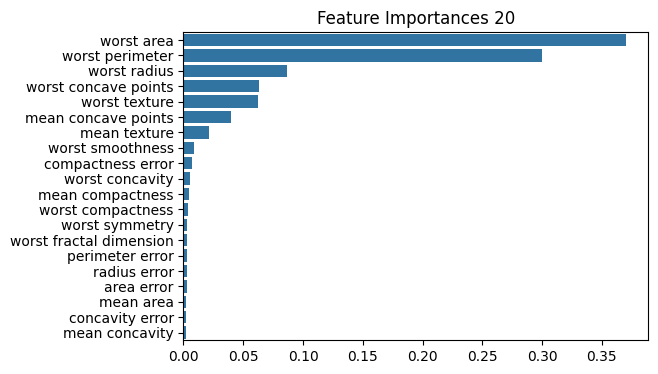

In [19]:
import time
from sklearn.ensemble import GradientBoostingClassifier
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)

print(f'학습시간: {time.time() - start_time:.3f}초')
pred = gb_clf.predict(X_test)
pred_proba = gb_clf.predict_proba(X_test)[:,1]
print_eval_score(y_test,pred, pred_proba, target_names=cancer.target_names)
plot_ftr_importances(gb_clf, cancer.feature_names, top_n=20)

#### 교차검증 및 하이퍼 파라미터 튜닝

- GridSearchCV 사용

In [20]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params={
        'n_estimators' : range(100,501,100),
        'subsample':np.arange(0.5, 1.1, 0.1),
       'min_samples_split':range(2,21,2),
       'min_samples_leaf':range(1,19,1),
       'max_depth':range(6,13,2)}

gb_clf = GradientBoostingClassifier(random_state=0)

start_time= time.time()
grid = GridSearchCV(gb_clf, param_grid=params, cv=5,verbose=1)
grid.fit(X_train, y_train)
print(f'GBM 총학습시간{time.time()-start_time:.3f}초')

Fitting 5 folds for each of 25200 candidates, totalling 126000 fits


- GridSearchCV 결과

In [ ]:
print(f'{grid}')

In [ ]:
result_df = pd.DataFrame(grid.cv_results)[['params',
                                           'mean_test_score',
                                           'rank_test_score']].sort_values(['rank_test_score'])
result_df.head()

In [ ]:
print(f'best parameter : {grid.best_params_}')
print(f'best val score: {grid.best_score_:.4f}')
best_clf = grid.best_estimator_
bpred = best_clf.predict(X_test)
bpred_proba = best_clf.predict_proba(X_test)[:,1]
print_eval_score(y_test, bpred, bpred_proba, target_names=cancer.target_names)

#### 최적의 하이퍼파라미터를 가진 분류기 성능 

#### 최적의 하이퍼 파라미터로 재 학습 및 예측/평가

-----------------------------------------------------